In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV , LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from pandas_profiling import ProfileReport
import numpy as np
%matplotlib inline
sns.set()

In [4]:
df = pd.read_csv("Data .csv")

In [8]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [65]:
df["Type"].unique()

array(['M', 'L', 'H'], dtype=object)

In [64]:
df1 = df.drop(["UDI", "Product ID"], axis = 1)

In [67]:
# map the type
df1['Type'] = df1['Type'].map({"L" : 0 , "M" : 1 , "H" : 2 })

In [68]:
df1["Type"]

0       1
1       0
2       0
3       0
4       0
       ..
9995    1
9996    2
9997    1
9998    2
9999    1
Name: Type, Length: 10000, dtype: int64

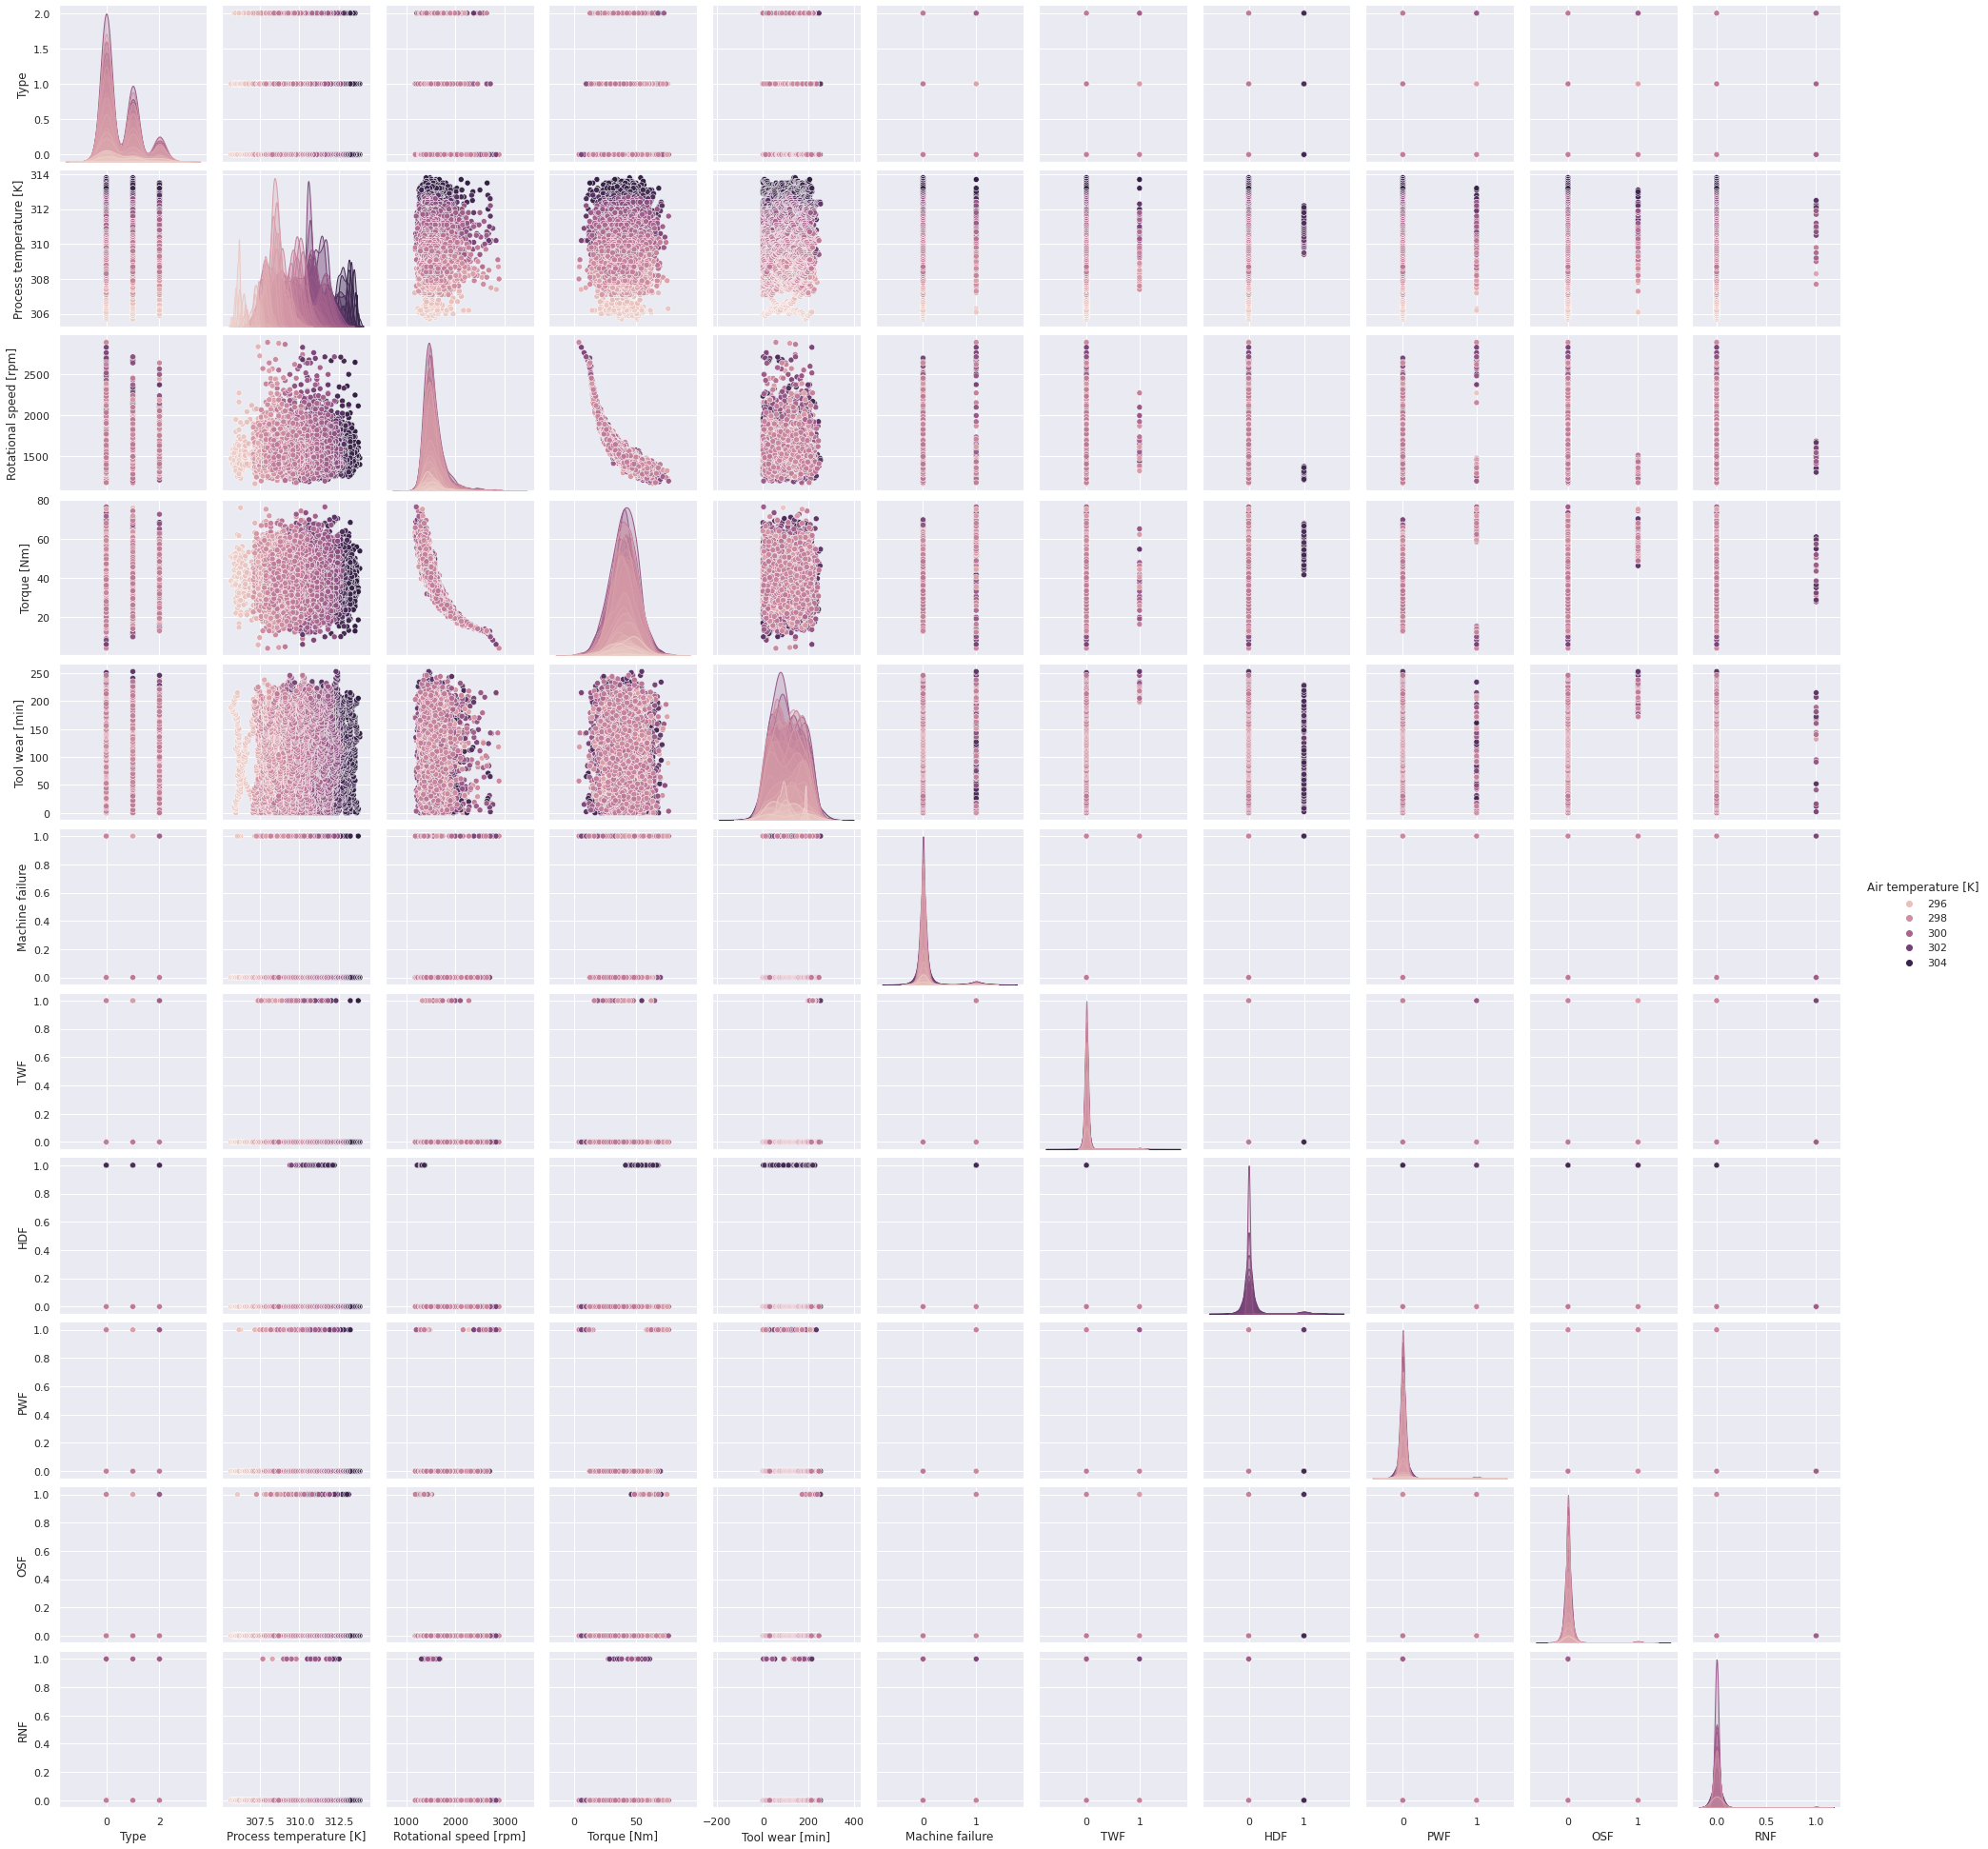

In [69]:
sns.pairplot(df1, hue= "Air temperature [K]")

In [70]:
# my target column
y = df1['Air temperature [K]']

array([[<AxesSubplot:title={'center':'Type'}>,
        <AxesSubplot:title={'center':'Process temperature [K]'}>,
        <AxesSubplot:title={'center':'Rotational speed [rpm]'}>],
       [<AxesSubplot:title={'center':'Torque [Nm]'}>,
        <AxesSubplot:title={'center':'Tool wear [min]'}>,
        <AxesSubplot:title={'center':'Machine failure'}>],
       [<AxesSubplot:title={'center':'TWF'}>,
        <AxesSubplot:title={'center':'HDF'}>,
        <AxesSubplot:title={'center':'PWF'}>],
       [<AxesSubplot:title={'center':'OSF'}>,
        <AxesSubplot:title={'center':'RNF'}>, <AxesSubplot:>]],
      dtype=object)

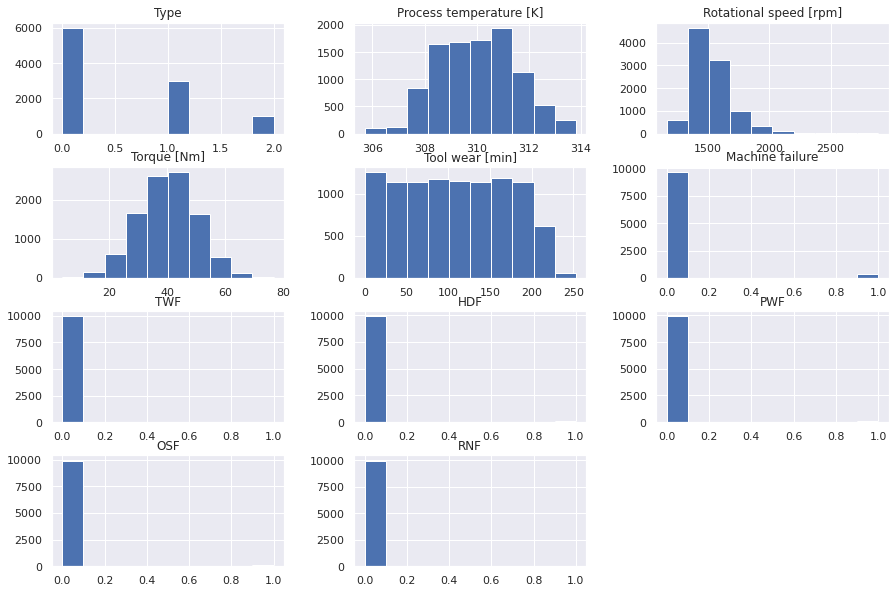

In [71]:
x = df1.drop(["Air temperature [K]"], axis = 1)
x.hist(figsize= (15,10))

In [72]:
# here we can see that machine failure is a more than 10
# so we drop  machine as its is just a representation of all the other failure
df_count =df[df['Machine failure']==1][['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].apply(pd.value_counts)

In [73]:
df_count

,TWF,HDF,PWF,OSF,RNF
0,293,224,244,241,338
1,46,115,95,98,1


In [74]:
df['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [75]:
df1.drop(["Machine failure"], axis = 1 , inplace= True )

In [76]:
df1

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0,0,0,0
2,0,298.1,308.5,1498,49.4,5,0,0,0,0,0
3,0,298.2,308.6,1433,39.5,7,0,0,0,0,0
4,0,298.2,308.7,1408,40.0,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14,0,0,0,0,0
9996,2,298.9,308.4,1632,31.8,17,0,0,0,0,0
9997,1,299.0,308.6,1645,33.4,22,0,0,0,0,0
9998,2,299.0,308.7,1408,48.5,25,0,0,0,0,0


In [79]:
df1.isna().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [80]:
x = df1.drop(['Air temperature [K]'], axis =1)
y = df1['Air temperature [K]']

In [81]:
x_train,x_test, y_train, y_test  = train_test_split(x, y, test_size = 0.25, random_state =100)

In [99]:
model = LinearRegression()

In [100]:
model.fit(x_train,y_train)

LinearRegression()

In [101]:
model.coef_

array([ 4.31372748e-03,  1.16727950e+00,  1.54979459e-04, -1.75863650e-04,
        1.33605377e-04,  1.61938889e-01,  1.69656406e+00,  1.24237083e-01,
       -1.61496673e-01, -1.17716248e-01])

In [102]:
cof_df = pd.DataFrame()
cof_df["feature"] = x.columns
cof_df["coef_"] = model.coef_

In [103]:
cof_df

,feature,coef_
0,Type,0.004314
1,Process temperature [K],1.167280
2,Rotational speed [rpm],0.000155
3,Torque [Nm],-0.000176
4,Tool wear [min],0.000134
5,TWF,0.161939
6,HDF,1.696564
7,PWF,0.124237
8,OSF,-0.161497
9,RNF,-0.117716


In [104]:
model.intercept_

-62.12250438216125

In [105]:
model.score(x_train,y_train)

0.7681473511145565

In [106]:
import statsmodels.api as sm

In [107]:
x = df1.drop(['Air temperature [K]'], axis =1)
y = df1['Air temperature [K]']
X = sm.add_constant(x)
model = sm.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Air temperature [K]   R-squared:                       0.776
Model:                             OLS   Adj. R-squared:                  0.775
Method:                  Least Squares   F-statistic:                     3454.
Date:                 Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                         01:17:06   Log-Likelihood:                -13648.
No. Observations:                10000   AIC:                         2.732e+04
Df Residuals:                     9989   BIC:                         2.740e+04
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -64.1656      2.000    -32.089      0.000     -68.085     -60.246
Type                       -0.0106      0.014     -0.747      0.455      -0.038       0.017
Process temperature [K]     1.1737      0.006    183.267      0.000       1.161       1.186
Rotational speed [rpm]      0.0002      0.000      1.551      0.121   -4.91e-05       0.000
Torque [Nm]                 0.0002      0.002      0.097      0.923      -0.004       0.004
Tool wear [min]          8.398e-05      0.000      0.553      0.580      -0.000       0.000
TWF                         0.1197      0.141      0.848      0.396      -0.157       0.396
HDF                         1.6944      0.090     18.824      0.000       1.518       1.871
PWF                         0.0660      0.108      0.613      0.540      -0.145       0.277
OSF                        -0.1169      0.100     -1.166      0.244      -0.313       0.080
RNF                        -0.0571      0.218     -0.262      0.793      -0.484       0.370
==============================================================================
Omnibus:                      648.025   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.380
Skew:                          -0.091   Prob(JB):                     3.85e-53
Kurtosis:                       2.261   Cond. No.                     3.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
df1.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [108]:
x

,Type,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,1,308.6,1551,42.8,0,0,0,0,0,0
1,0,308.7,1408,46.3,3,0,0,0,0,0
2,0,308.5,1498,49.4,5,0,0,0,0,0
3,0,308.6,1433,39.5,7,0,0,0,0,0
4,0,308.7,1408,40.0,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,1,308.4,1604,29.5,14,0,0,0,0,0
9996,2,308.4,1632,31.8,17,0,0,0,0,0
9997,1,308.6,1645,33.4,22,0,0,0,0,0
9998,2,308.7,1408,48.5,25,0,0,0,0,0


In [92]:
# as the data is not odf scale me do a scaling of all the parameter
pre_scaler = StandardScaler()

In [110]:
arr = pre_scaler.fit_transform(x)
df3 = pd.DataFrame(arr, columns=x.columns)

In [111]:
df3

,Type,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,0.744413,-0.947360,0.068185,0.282200,-1.695984,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
1,-0.745307,-0.879959,-0.729472,0.633308,-1.648852,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
2,-0.745307,-1.014761,-0.227450,0.944290,-1.617430,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
3,-0.745307,-0.947360,-0.590021,-0.048845,-1.586009,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
4,-0.745307,-0.879959,-0.729472,0.001313,-1.554588,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
...,...,...,...,...,...,...,...,...,...,...
9995,0.744413,-1.082162,0.363820,-1.052012,-1.476034,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
9996,2.234132,-1.082162,0.520005,-0.821283,-1.428902,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
9997,0.744413,-0.947360,0.592519,-0.660777,-1.350349,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
9998,2.234132,-0.879959,-0.729472,0.854005,-1.303217,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363


In [114]:
df3.isna().sum()

Type                       0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_df["Feature"] = x.columns
vif_df['vif']= [variance_inflation_factor(arr,i) for i in range(arr.shape[1])]

In [116]:
vif_df

,Feature,vif
0,Type,1.003556
1,Process temperature [K],1.004900
2,Rotational speed [rpm],5.154399
3,Torque [Nm],5.222906
4,Tool wear [min],1.039904
5,TWF,1.015758
6,HDF,1.025136
7,PWF,1.212155
8,OSF,1.085636
9,RNF,1.002016


In [124]:
model = LinearRegression()
x= df3
y = df['Air temperature [K]']
x_train,x_test, y_train, y_test  = train_test_split(x, y, test_size = 0.25, random_state =100)

model.fit(x_train,y_train)

LinearRegression()

In [125]:
model.coef_

array([ 0.00289566,  1.73184594,  0.02778396, -0.00175309,  0.00850411,
        0.01095794,  0.18088707,  0.01205148, -0.01590882, -0.00512626])

In [126]:
model.intercept_

300.008288032474

In [127]:
cof_df = pd.DataFrame()
cof_df["feature"] = x.columns
cof_df["coef_"] = model.coef_

In [128]:
cof_df

,feature,coef_
0,Type,0.002896
1,Process temperature [K],1.731846
2,Rotational speed [rpm],0.027784
3,Torque [Nm],-0.001753
4,Tool wear [min],0.008504
5,TWF,0.010958
6,HDF,0.180887
7,PWF,0.012051
8,OSF,-0.015909
9,RNF,-0.005126


In [129]:
model.score(x_test,y_test)

0.7964125774373565

In [130]:
x = df3
y = df1['Air temperature [K]']
X = sm.add_constant(x)
model = sm.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Air temperature [K]   R-squared:                       0.776
Model:                             OLS   Adj. R-squared:                  0.775
Method:                  Least Squares   F-statistic:                     3454.
Date:                 Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                         01:25:11   Log-Likelihood:                -13648.
No. Observations:                10000   AIC:                         2.732e+04
Df Residuals:                     9989   BIC:                         2.740e+04
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     300.0049      0.009   3.17e+04      0.000     299.986     300.024
Type                       -0.0071      0.009     -0.747      0.455      -0.026       0.012
Process temperature [K]     1.7414      0.010    183.267      0.000       1.723       1.760
Rotational speed [rpm]      0.0334      0.022      1.551      0.121      -0.009       0.076
Torque [Nm]                 0.0021      0.022      0.097      0.923      -0.040       0.045
Tool wear [min]             0.0053      0.010      0.553      0.580      -0.014       0.024
TWF                         0.0081      0.010      0.848      0.396      -0.011       0.027
HDF                         0.1807      0.010     18.824      0.000       0.162       0.199
PWF                         0.0064      0.010      0.613      0.540      -0.014       0.027
OSF                        -0.0115      0.010     -1.166      0.244      -0.031       0.008
RNF                        -0.0025      0.009     -0.262      0.793      -0.021       0.016
==============================================================================
Omnibus:                      648.025   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.380
Skew:                          -0.091   Prob(JB):                     3.85e-53
Kurtosis:                       2.261   Cond. No.                         4.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""